In [2]:
import torch
from cephdataset import *

from mltool.universal_model_util import get_model_para_detail
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES']="2"

In [4]:
from model.othermodels import *

In [5]:
from train.pretrain import *
from train.pretrain import get_args

In [5]:
ckpt_path = "checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet_138/ts_3_pretrain-2D706N_per_6_step/03_15_14_37_50207-seed_42/"
args=get_args(os.path.join(ckpt_path,"config.json"))
args= parse_default_args(args)

args.use_wandb=0
args.gpu = args.local_rank = gpu  = local_rank = 0
##### parse args: dataset_kargs / model_kargs / train_kargs  ###########
args= parse_default_args(args)
SAVE_PATH = get_ckpt_path(args)
SAVE_PATH = "debug"
args.SAVE_PATH = str(SAVE_PATH)
#args.pretrain_weight = os.path.join(args.SAVE_PATH,'pretrain_latest.pt')
########## inital log ###################
logsys = create_logsys(args,False)
args.distributed = False

if args.distributed:
    if args.dist_url == "env://" and args.rank == -1:
        args.rank = int(os.environ["RANK"])
    if args.multiprocessing_distributed:
        # For multiprocessing distributed training, rank needs to be the
        # global rank among all the processes
        args.rank = args.rank * ngpus_per_node + local_rank
    logsys.info(f"start init_process_group,backend={args.dist_backend}, init_method={args.dist_url},world_size={args.world_size}, rank={args.rank}")
    dist.init_process_group(backend=args.dist_backend, init_method=args.dist_url,world_size=args.world_size, rank=args.rank)

model           = build_model(args)
#param_groups    = timm.optim.optim_factory.add_weight_decay(model, args.weight_decay)
optimizer,lr_scheduler,criterion = build_optimizer(args,model)
loss_scaler     = torch.cuda.amp.GradScaler(enabled=True)
logsys.info(f'use lr_scheduler:{lr_scheduler}')

In [6]:
ckpt_path = "checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet_138/ts_3_pretrain-2D706N_per_6_step/03_15_14_37_50207-seed_42/"
args=get_args(os.path.join(ckpt_path,"config.json"))

args.model_type = 'CK_LgNet'
args.output_channel=69
args.use_pos_embed=1
args.subweight = ""
args.mode = "fourcast"
args.pretrain_weight="checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet/ts_3_pretrain-2D706N_per_6_step/pruned_first64_channel_out/backbone.best.pt"
args= parse_default_args(args)
args.use_wandb=0
args.gpu = args.local_rank = gpu  = local_rank = 0
##### parse args: dataset_kargs / model_kargs / train_kargs  ###########
args= parse_default_args(args)
SAVE_PATH = get_ckpt_path(args)
SAVE_PATH = "debug"
args.SAVE_PATH = str(SAVE_PATH)
#args.pretrain_weight = os.path.join(args.SAVE_PATH,'pretrain_latest.pt')
########## inital log ###################
logsys = create_logsys(args,False)
args.distributed = False

if args.distributed:
    if args.dist_url == "env://" and args.rank == -1:
        args.rank = int(os.environ["RANK"])
    if args.multiprocessing_distributed:
        # For multiprocessing distributed training, rank needs to be the
        # global rank among all the processes
        args.rank = args.rank * ngpus_per_node + local_rank
    logsys.info(f"start init_process_group,backend={args.dist_backend}, init_method={args.dist_url},world_size={args.world_size}, rank={args.rank}")
    dist.init_process_group(backend=args.dist_backend, init_method=args.dist_url,world_size=args.world_size, rank=args.rank)

model           = build_model(args)
#param_groups    = timm.optim.optim_factory.add_weight_decay(model, args.weight_decay)
optimizer,lr_scheduler,criterion = build_optimizer(args,model)
loss_scaler     = torch.cuda.amp.GradScaler(enabled=True)
logsys.info(f'use lr_scheduler:{lr_scheduler}')

2023-03-21 11:41:54,006 model args: img_size= (64, 128)
2023-03-21 11:41:54,008 model args: patch_size= (2, 2)


log at debug
wandb id: None
wandb is off, the recorder list is  ['tensorboard'], we pass wandb
this is pre-set model, we disable all config


2023-03-21 11:41:57,733 use model ==> SWIN_Feature
2023-03-21 11:41:57,735 Rank: 0, Local_rank: 0 | Number of Parameters: 200882304, Number of Buffers: 0, Size of Model: 766.3052 MB



loading model from checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet/ts_3_pretrain-2D706N_per_6_step/pruned_first64_channel_out/backbone.best.pt...........
loading model weight success...........
loading model success...........


2023-03-21 11:42:00,812 use lr_scheduler:None


In [11]:
a = torch.randn(1,71,64,128).cuda()
model = model.cuda()
model2= model2.cuda()
with torch.no_grad():
    print(torch.dist(model(a),model2(a)))

tensor(0.0001, device='cuda:0')


In [27]:
#torch.save(new_state_dict,"checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet_69/ts_3_pretrain-2D706N_per_6_step/pruned_first64_channel_out/backbone.best.pt")

In [10]:
from networks.utils.utils import window_partition, window_reverse, ScaleOffset, attn_norm

In [85]:
test_dataset,  test_dataloader = get_test_dataset(args,test_dataset_tensor=None,test_record_load=None)

use dataset in datasets/weatherbench32x64/


In [11]:
create_fourcast_metric_table(ckpt_path,logsys,test_dataset,collect_names=['500hPa_geopotential','850hPa_temperature'],return_value = ['Z500'])

tensor(395.5527)

In [9]:
args.mode = 'fourcast'

In [10]:
#pretrain_path = os.path.join(ckpt_path,"backbone.best.pt")
pretrain_path = os.path.join(ckpt_path,"pretrain_latest.pt")
#pretrain_path = os.path.join("checkpoints/WeathBench32x64/CK_LgNet/ts_3_finetune-2D706N_per_6_step/grow_up_inner_1536_model/grow_up.weight.pt")
args.pretrain_weight = pretrain_path

In [11]:
logsys.info(f"loading weight from {args.pretrain_weight}")
start_epoch, start_step, min_loss = load_model(model.module if args.distributed else model, optimizer, lr_scheduler, loss_scaler, path=args.pretrain_weight, 
                    only_model= (args.mode=='fourcast') or (args.mode=='finetune' and not args.continue_train) ,loc = 'cuda:{}'.format(args.gpu))
if args.more_epoch_train:
    assert args.pretrain_weight
    print(f"detect more epoch training, we will do a copy processing for {args.pretrain_weight}")
    os.system(f'cp {args.pretrain_weight} {args.pretrain_weight}-epoch{start_epoch}')
logsys.info("done!")

2023-03-20 18:38:00,753 loading weight from checkpoints/WeathBench32x64/CK_LgNet/ts_3_finetune-2D706N_per_6_step/03_10_18_59_45137-seed_73001/pretrain_latest.pt


loading model from checkpoints/WeathBench32x64/CK_LgNet/ts_3_finetune-2D706N_per_6_step/03_10_18_59_45137-seed_73001/pretrain_latest.pt...........


2023-03-20 18:38:01,754 done!


loading model weight success...........
loading model success...........


In [6]:
from networks.LGNet import LGnet_grow_up_full_recursively,SD_attn_grow_up_inner_recursively

In [7]:
from mltool.universal_model_util import get_model_para_detail

In [8]:
SD_attn_grow_up_inner_recursively(model,1152*2)

growing SD_attn of [64, 128] from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of [64, 128] from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of [64, 128] from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of [64, 128] from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of (4, 8) from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of (4, 8) from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of (4, 8) from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of (4, 8) from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of (4, 8) from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of (4, 8) from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of (4, 8) from (1152-1152-1152) to (1152-2304-1152)
growing SD_attn of (4, 8) from (1152-1152-1152) to (1152-2304-1152)


In [9]:
torch.save(model.state_dict(),"checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet/ts_3_pretrain-2D706N_per_6_step/attn_grow_up/backbone.best.pt")

In [11]:
LGnet_grow_up_full_recursively(model,2)

      growing PatchEmbed from (1152,) to (2304,)
                            growing LayerNorm from (1152,) to (2304,)
       growing SD_attn of [64, 128] from (1152-1152-1152) to (2304-2304-2304)
              growing LayerNorm from (1152,) to (2304,)
       growing Mlp from (1152-4608-1152) to (2304-9216-2304)
             growing LayerNorm from (1152,) to (2304,)
       growing SD_attn of [64, 128] from (1152-1152-1152) to (2304-2304-2304)
              growing LayerNorm from (1152,) to (2304,)
       growing Mlp from (1152-4608-1152) to (2304-9216-2304)
             growing LayerNorm from (1152,) to (2304,)
       growing SD_attn of [64, 128] from (1152-1152-1152) to (2304-2304-2304)
              growing LayerNorm from (1152,) to (2304,)
       growing Mlp from (1152-4608-1152) to (2304-9216-2304)
             growing LayerNorm from (1152,) to (2304,)
       growing SD_attn of [64, 128] from (1152-1152-1152) to (2304-2304-2304)
              growing LayerNorm from (1152,) to (2304

In [12]:
state_dict = model.state_dict()

pos_embed = state_dict['backbone.backbone.net.pos_embed'] 
state_dict['backbone.backbone.net.pos_embed'] = torch.cat([pos_embed,pos_embed],-1)

torch.save(state_dict,"checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet/ts_3_pretrain-2D706N_per_6_step/full_grow_up/backbone.best.pt")

In [15]:
args.model_kargs['out_chans']

69

In [7]:
ckpt_path = "checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet_138/ts_3_pretrain-2D706N_per_6_step/03_15_14_37_50207-seed_42/"
args=get_args(os.path.join(ckpt_path,"config.json"))

args.model_type = 'HalfGrowUp_CK_LgNet'
args.output_channel=69
args.use_pos_embed=1
args.subweight = ""
args.mode = "fourcast"
args.pretrain_weight="checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet/ts_3_pretrain-2D706N_per_6_step/attn_grow_up/backbone.best.pt"
args= parse_default_args(args)
args.use_wandb=0
args.gpu = args.local_rank = gpu  = local_rank = 0
##### parse args: dataset_kargs / model_kargs / train_kargs  ###########
args= parse_default_args(args)
SAVE_PATH = get_ckpt_path(args)
SAVE_PATH = "debug"
args.SAVE_PATH = str(SAVE_PATH)
#args.pretrain_weight = os.path.join(args.SAVE_PATH,'pretrain_latest.pt')
########## inital log ###################
logsys = create_logsys(args,False)
args.distributed = False

if args.distributed:
    if args.dist_url == "env://" and args.rank == -1:
        args.rank = int(os.environ["RANK"])
    if args.multiprocessing_distributed:
        # For multiprocessing distributed training, rank needs to be the
        # global rank among all the processes
        args.rank = args.rank * ngpus_per_node + local_rank
    logsys.info(f"start init_process_group,backend={args.dist_backend}, init_method={args.dist_url},world_size={args.world_size}, rank={args.rank}")
    dist.init_process_group(backend=args.dist_backend, init_method=args.dist_url,world_size=args.world_size, rank=args.rank)

model3           = build_model(args)
#param_groups    = timm.optim.optim_factory.add_weight_decay(model, args.weight_decay)
optimizer,lr_scheduler,criterion = build_optimizer(args,model)
loss_scaler     = torch.cuda.amp.GradScaler(enabled=True)
logsys.info(f'use lr_scheduler:{lr_scheduler}')

2023-03-21 11:42:08,553 model args: img_size= (64, 128)
2023-03-21 11:42:08,553 model args: patch_size= (2, 2)


log at debug
wandb id: None
wandb is off, the recorder list is  ['tensorboard'], we pass wandb
this is pre-set model, we disable all config


2023-03-21 11:42:13,302 use model ==> SWIN_Feature
2023-03-21 11:42:13,306 Rank: 0, Local_rank: 0 | Number of Parameters: 264624768, Number of Buffers: 0, Size of Model: 1009.4634 MB



loading model from checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet/ts_3_pretrain-2D706N_per_6_step/attn_grow_up/backbone.best.pt...........
loading model weight success...........
loading model success...........


2023-03-21 11:42:14,405 use lr_scheduler:None


In [8]:
# model3 = HalfGrowUp_CK_LgNet(**args.model_kargs)
# start_epoch, start_step, min_loss = load_model(model3, optimizer, lr_scheduler, loss_scaler, 
# path="checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet/ts_3_pretrain-2D706N_per_6_step/attn_grow_up/backbone.best.pt",
# only_model= True ,loc = 'cuda:{}'.format(args.gpu))
# #model3.load_state_dict(torch.load("checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet_69/ts_3_pretrain-2D706N_per_6_step/attn_grow_up/backbone.best.pt"))

In [14]:
model.backbone.backbone.net.final

Linear(in_features=1152, out_features=138, bias=False)

In [14]:
a = torch.randn(1,71,64,128).cuda()
cons  = a[:,:2]
model = model.cuda()
model3= model3.cuda()
with torch.no_grad():
    print(torch.dist(model(torch.cat([model(a),cons],1)),model3(torch.cat([model3(a),cons],1))))

tensor(0.0069, device='cuda:0')


In [11]:
args.model_kargs['embed_dim'] *=2

In [13]:
from model.othermodels import FullGrowUp_CK_LgNet
model3 = FullGrowUp_CK_LgNet(**args.model_kargs)
start_epoch, start_step, min_loss = load_model(model3, optimizer, lr_scheduler, loss_scaler, 
path="checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet/ts_3_pretrain-2D706N_per_6_step/full_grow_up/backbone.best.pt",
only_model= True ,loc = 'cuda:{}'.format(args.gpu))
#model3.load_state_dict(torch.load("checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet_69/ts_3_pretrain-2D706N_per_6_step/attn_grow_up/backbone.best.pt"))

this is pre-set model, we disable all config
loading model from checkpoints/WeathBench64x128CK/SWIN_Feature-CK_LgNet/ts_3_pretrain-2D706N_per_6_step/full_grow_up/backbone.best.pt...........
loading model weight success...........
loading model success...........


In [20]:
# args.model_kargs['embed_dim'] *=2
# model3 = FullGrowUp_CK_LgNet(**args.model_kargs)
# model3.load_state_dict(torch.load("checkpoints/WeathBench32x64/CK_LgNet/ts_3_finetune-2D706N_per_6_step/grow_up_full_1536_model/grow_up.weight.pt"))

this is pre-set model, we disable all config


<All keys matched successfully>

In [10]:
model1 = model.cuda()
model3 = model3.cuda()

In [11]:
a = torch.randn(1, 71, 64, 128).cuda()
with torch.no_grad():
    print(torch.dist(model1(a),model3(a)))

tensor(0.0010, device='cuda:0')


In [14]:
from networks.utils.Attention import *

In [16]:
a = torch.randn(1,68,32,64).cuda()
layer = model2.backbone.net.layers[0]
block = layer.blocks[0]
x = a.clone()
with torch.no_grad():
    #for blk in layer.blocks[:1]:x = blk(x)
    #x1 = compute(block.attn,(block.norm(x)))
    original_output = model2(x)

layer = model3.backbone.net.layers[0]
block = layer.blocks[0]
x = a.clone()
with torch.no_grad():
    #for blk in layer.blocks[:1]:x = blk(x)
    #x2 = compute(block.attn,(block.norm(x)))
    grow_up_output = model3(x)

torch.abs(original_output - grow_up_output).max()

tensor(0., device='cuda:0')

In [83]:
torch.dist(original_output,grow_up_output)

tensor(6.5100, device='cuda:0')

#### test

In [34]:
args.mode

'fourcast'

In [14]:
args.valid_batch_size = 4
args.dataset_kargs['use_offline_data']=0
args.dataset_kargs['time_step']  = args.time_step = 22
test_dataset,  test_dataloader = get_test_dataset(args,test_dataset_tensor=None,test_record_load=None)

use dataset in datasets/weatherbench32x64


In [142]:
4608//3

1536

In [88]:
len(train_dataset)

324301

In [87]:
71*1152*2*2

327168

In [82]:
args.debug  = 0 
train_dataset, val_dataset, train_dataloader,val_dataloader = get_train_and_valid_dataset(args,
               train_dataset_tensor=None,train_record_load=None,
               valid_dataset_tensor=None,valid_record_load=None)
logsys.info(f"use dataset ==> {train_dataset.__class__.__name__}")
logsys.info(f"Start training for {args.epochs} epochs")
master_bar = logsys.create_master_bar(args.epochs)
accu_list = ['valid_loss']
metric_dict = logsys.initial_metric_dict(accu_list)

use dataset in datasets/weatherbench32x64/


2023-03-16 14:09:24,886 use dataset ==> WeathBench32x64
2023-03-16 14:09:24,886 Start training for 20 epochs


use dataset in datasets/weatherbench32x64/


##### speed test check

In [11]:
model = model.cuda()

In [16]:
%%timeit
batch = [torch.randn(4,70,32,64).cuda().half(),
         torch.randn(4,70,32,64).cuda().half(),
         torch.randn(4,70,32,64).cuda().half()]
model.activate_stamps     = [[1, 2], [2]]
model.activate_error_coef = [[0, 1, 1, 1.5, 'quantity'],
                             [0, 2, 2, 1.5, 'quantity'],
                             [1, 2, 2, 3.0, 'quantity']]
model.consistancy_alpha   = None
model.train()
logsys.train()
with torch.cuda.amp.autocast(enabled=model.use_amp):
    loss, abs_loss, iter_info_pool,ltmv_pred,target  =run_one_iter(model, batch, criterion, 'train', gpu, train_dataset)
loss_scaler.scale(loss).backward()   
loss_scaler.step(optimizer)
loss_scaler.update()   
optimizer.zero_grad()

107 ms ± 829 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
batch = [torch.randn(4,70,32,64).cuda().half(),
         torch.randn(4,70,32,64).cuda().half(),
         torch.randn(4,70,32,64).cuda().half()]
model.activate_stamps     = None
model.activate_error_coef = None
model.consistancy_alpha   = [1,0,0]
model.train()
logsys.train()
with torch.cuda.amp.autocast(enabled=model.use_amp):
    loss, abs_loss, iter_info_pool,ltmv_pred,target  =run_one_iter(model, batch, criterion, 'train', gpu, train_dataset)
loss_scaler.scale(loss).backward()   
loss_scaler.step(optimizer)
loss_scaler.update()   
optimizer.zero_grad()

175 ms ± 683 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


##### test

In [142]:
data_loader = test_dataloader
random_repeat = 0
snap_index=None
do_error_propagration_monitor=False

model.eval()
logsys.eval()
status     = 'test'
gpu        = dist.get_rank() if hasattr(model,'module') else 0
Fethcher   = Datafetcher
prefetcher = Fethcher(data_loader,next(model.parameters()).device)
batches = len(data_loader)
inter_b    = logsys.create_progress_bar(batches,unit=' img',unit_scale=data_loader.batch_size)
device = next(model.parameters()).device
data_cost = train_cost = rest_cost = 0
now = time.time()
model.clim = torch.Tensor(data_loader.dataset.clim_tensor).to(device)
fourcastresult={}
save_prediction_first_step = None#torch.zeros_like(data_loader.dataset.data)
save_prediction_final_step = None#torch.zeros_like(data_loader.dataset.data)
# = 100
intervel = batches//logsys.log_trace_times + 1

with torch.no_grad():
    inter_b.lwrite("load everything, start_validating......", end="\r")
    while inter_b.update_step():
        #if inter_b.now>10:break
        data_cost += time.time() - now;now = time.time()
        step        = inter_b.now
        idxes,batch = prefetcher.next()
        batch       = make_data_regular(batch,half_model)
        break

In [16]:
dataset = test_dataset

In [17]:
time_step_1_mode = False

In [143]:
start = batch[0:model.history_length] # start must be a list    
myaccu= []
i = 1
with torch.no_grad():
    end = batch[i:i+model.pred_len]
    end = end[0] if len(end) == 1 else end
    ltmv_pred, target, extra_loss, extra_info_from_model_list, start = once_forward(model,i,start,end,dataset,time_step_1_mode)
    #ltmv_pred, target = recovery_tensor(dataset,start,end,ltmv_pred,target,index=idxes+i) # the index is the timestamp position in dataset
    #ltmv_trues = dataset.inv_normlize_data([target])[0]#.detach().cpu() ### use CUDA computing
    #ltmv_preds = ltmv_pred#.detach().cpu()
    #time_list  = range(i,i+model.pred_len)
    #i+=model.pred_len         

In [144]:
dataset.time_intervel

6

In [99]:
# ltmv_pred, target = recovery_tensor(dataset,start,end,ltmv_pred,target,index=idxes+i*dataset.time_intervel)

In [ ]:
# real_mean,real_std = dataset.get_space_time_mean_std(1)
real_mean,real_std = torch.from_numpy(real_mean),torch.from_numpy(real_std)
origin = target[0]* real_std.to(x.device) + real_mean.to(x.device)
origin = origin.cpu().numpy()

In [ ]:
torch.dist(batch[1][:,:68],target.cpu())

In [126]:
mean.dtype

dtype('float64')

In [145]:
nowidx      = idxes+i*dataset.time_intervel
tidx        = 3
idx         = nowidx[tidx]
odata       = dataset.load_otensor(idx)[dataset.channel_choice]
mean,std    = dataset.get_space_time_mean_std(idx)
real_target = (odata-mean)/std
dataset_out = dataset[tidx][1][i][:68]
print(np.linalg.norm(real_target-dataset_out))
real_mean,real_std = torch.from_numpy(mean),torch.from_numpy(std)
target_tensor = target[tidx] #batch[1][tidx,:68]#target[tidx]
print(np.linalg.norm(target_tensor.cpu().numpy()-dataset_out))
origin = target_tensor* real_std.to(target_tensor.device) + real_mean.to(target_tensor.device)
origin = origin.cpu().numpy()
print(np.linalg.norm(odata-origin))

8.162045039606877e-09
9.43763593773303e-06
0.010113620624025203


In [169]:
mean1,std1    = dataset.get_space_time_mean_std(1)
mean2,std2    = dataset.get_space_time_mean_std(50)

In [156]:
from mltool.visualization import *

In [188]:
dataset.loaded_flag.keys()

dict_keys([8761, 8762, 8763, 8764, 8760, 8766, 8772, 8778, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 8767, 8773, 8779, 1, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73, 79, 85, 91, 97, 103, 108, 8765, 8768, 8774, 8780, 2, 8, 14, 20, 26, 32, 38, 44, 50, 56, 62, 68, 74, 80, 86, 92, 98, 104, 8769, 8775, 8781, 3, 9, 15, 21, 27, 33, 39, 45, 51, 57, 63, 69, 75, 81, 87, 93, 99, 105, 8770, 40, 28])

In [189]:
dataset.get_space_time_mean_std(62)[0].shape

(68, 32, 64)

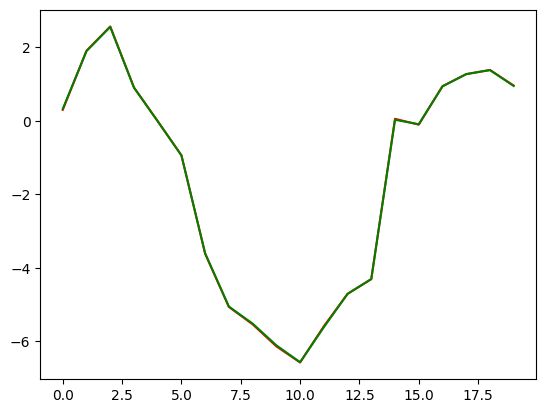

In [190]:
%matplotlib inline
plt.plot(dataset.get_space_time_mean_std(62)[0][:20,16,32],'r')
plt.plot(dataset.get_space_time_mean_std(64)[0][:20,16,32],'g')

In [162]:
np.linalg.norm(std1[0] - std2[0])

1.3778640586220363

In [128]:
recovery = real_target.astype('float32')

In [52]:
target[0]

torch.Size([4, 68, 32, 64])

In [51]:
ltmv_pred.shape

torch.Size([4, 68, 32, 64])

In [ ]:
ltmv_pred -  target

In [49]:
((ltmv_pred -  target)**2).mean()

tensor(0.0089, device='cuda:0')

In [16]:
with torch.cuda.amp.autocast(enabled=model.use_amp):
    fourcastresult,extra_info = run_one_fourcast_iter(model, batch, idxes, fourcastresult,data_loader.dataset,
                             save_prediction_first_step=save_prediction_first_step,
                             save_prediction_final_step=save_prediction_final_step,
                             snap_index=the_snap_index_in_iter,do_error_propagration_monitor=do_error_propagration_monitor)

SyntaxError: 'break' outside loop (4217269823.py, line 27)

In [65]:
with torch.no_grad():
    UVTPHSC = batch[0]
    with torch.cuda.amp.autocast(enabled=model.use_amp):
        p    = model.UVTPHSC2p(UVTPHSC)
        x    = torch.cat([UVTPHSC,p],1)
        print(x.isnan().any())
        
        shape = x.shape
        #print(x.shape)
        # argue the w resolution.
        pad = model.UVTPHSCp2uvth.backbone.get_w_resolution_pad(shape)
        if pad is not None:x = F.pad(x.flatten(0,1),(0,0,pad,pad),mode='replicate').reshape(*shape[:-2],-1,shape[-1])
        #print(x.shape)
        B = x.shape[0]
        ot_shape = x.shape[2:]
        x = x.reshape(B,-1,*model.UVTPHSCp2uvth.backbone.img_size)# (B, p, z, h, w) or (B, p, h, w)
        #timer.restart(level=0)
        #print(torch.std_mean(x))
        print(x.isnan().any())
        
        #x = model.UVTPHSCp2uvth.backbone.forward_features(x);#print(torch.std_mean(x))
        x = model.UVTPHSCp2uvth.backbone.patch_embed(x)
        print(x.isnan().any())
        x += model.UVTPHSCp2uvth.backbone.pos_embed
        print(x.isnan().any())
        x = model.UVTPHSCp2uvth.backbone.pos_drop(x)
        print(x.isnan().any())
        #print(torch.std_mean(x))
        print("==================")
        if not model.UVTPHSCp2uvth.backbone.checkpoint_activations:
            for num,blk in enumerate(model.UVTPHSCp2uvth.backbone.blocks):
                x = blk(x);#print(torch.std_mean(x))
                print(x.isnan().any())
                if num==2:break
        else:
            x = checkpoint_sequential(model.UVTPHSCp2uvth.backbone.blocks, 4, x)
#         print("==================")
#         x = model.UVTPHSCp2uvth.backbone.norm(x).transpose(1, 2);
#         print(x.isnan().any())
#         x = torch.reshape(x, [-1, model.UVTPHSCp2uvth.backbone.embed_dim, *model.UVTPHSCp2uvth.backbone.final_shape])
#         print(x.isnan().any())
        #timer.record('forward_features',level=0)
#         x = model.UVTPHSCp2uvth.backbone.final_dropout(x)
        
        
#         #timer.record('final_dropout',level=0)
#         x = model.UVTPHSCp2uvth.backbone.pre_logits(x);#print(torch.std_mean(x))
        
#         print(x.isnan().any())
#         #timer.record('pre_logits',level=0)
#         x = model.UVTPHSCp2uvth.backbone.head(x)  # print(torch.std_mean(x))
        
#         print(x.isnan().any())
#         if model.UVTPHSCp2uvth.backbone.history_length >1:
#             x = x.flatten(1,2).transpose(1,-1)
#             x = model.UVTPHSCp2uvth.backbone.last_Linear_layer(x)
#             x = x.transpose(1,-1)
#             ot_shape=ot_shape[1:]
#         #timer.record('head',level=0)
#         x = x.reshape(B,-1,*ot_shape)
#         if pad is not None:
#             x = x[...,pad:-pad,:]

tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')


#### train

In [ ]:
#args.dataset_kargs['cross_sample']=args.cross_sample=0

In [16]:
args.dataset_kargs['batch_size']=args.batch_size = 1

In [17]:
args.dataset_kargs['cross_sample']=args.cross_sample=0

In [18]:
args.dataset_kargs['use_offline_data']=0

In [19]:
args.dataset_kargs['patch_range']=(3,5,5)

In [24]:
args.debug  = 1
args.dataset_kargs['batch_size'] = 1

In [25]:
train_dataset, val_dataset, train_dataloader,val_dataloader = get_train_and_valid_dataset(args,
               train_dataset_tensor=None,train_record_load=None,
               valid_dataset_tensor=None,valid_record_load=None)
logsys.info(f"use dataset ==> {train_dataset.__class__.__name__}")
logsys.info(f"Start training for {args.epochs} epochs")
master_bar = logsys.create_master_bar(args.epochs)
accu_list = ['valid_loss']
metric_dict = logsys.initial_metric_dict(accu_list)

use offline data mode <2>: train/valid/test use offline data
use dataset in datasets/weatherbench_6hour
load data from datasets/weatherbench_6hour/test_2D70N.npy
use offline data mode <2>: train/valid/test use offline data
use dataset in datasets/weatherbench_6hour
load data from datasets/weatherbench_6hour/test_2D70N.npy


2023-02-13 20:28:56,408 use dataset ==> WeathBench7066
2023-02-13 20:28:56,409 Start training for 100 epochs


In [17]:
args.dataset_kargs['cross_sample']=args.cross_sample=1
train_dataset.cross_sample  =1
train_dataloader  = torch.utils.data.DataLoader(train_dataset,1)

In [18]:
train_dataset.cross_sample  =0
train_dataloader  = torch.utils.data.DataLoader(train_dataset,300)

In [ ]:
# val_dataset.cross_sample  =0 
# val_dataloader = torch.utils.data.DataLoader(val_dataset,256)

In [26]:
epoch = 0
start_step = 0
data_loader = train_dataloader
status = 'train'
if status == 'train':
    model.train()
    logsys.train()
elif status == 'valid':
    model.eval()
    logsys.eval()
else:
    raise NotImplementedError
accumulation_steps = model.accumulation_steps # should be 16 for finetune. but I think its ok.
half_model = next(model.parameters()).dtype == torch.float16

data_cost  = []
train_cost = []
rest_cost  = []
now = time.time()

Fethcher   = RandomSelectPatchFetcher if( status =='train' and \
                                          data_loader.dataset.use_offline_data and \
                                          data_loader.dataset.split=='train' and \
                                          'Patch' in data_loader.dataset.__class__.__name__) else Datafetcher
device     = next(model.parameters()).device
prefetcher = Fethcher(data_loader,device)
#raise
batches    = len(data_loader)

inter_b    = logsys.create_progress_bar(batches,unit=' img',unit_scale=data_loader.batch_size)
gpu        = dist.get_rank() if hasattr(model,'module') else 0

if start_step == 0:optimizer.zero_grad()
intervel = batches//100 + 1


total_diff,total_num  = torch.Tensor([0]).to(device), torch.Tensor([0]).to(device)
nan_count = 0
Nodeloss1 = Nodeloss2 = Nodeloss12 = -1

inter_b.lwrite(f"load everything, start_{status}ing......", end="\r")
preds = []
reals = []

In [33]:
train_dataset.cross_sample  =0
train_dataloader  = torch.utils.data.DataLoader(train_dataset,1)

In [46]:
val_dataset.cross_sample  = 1
val_dataloader  = torch.utils.data.DataLoader(val_dataset,1)

In [12]:
model.accumulation_steps = 1

In [53]:
import time

In [34]:
epoch = 0
start_step = 0
data_loader = train_dataloader
status = 'valid'
if status == 'train':
    model.train()
    logsys.train()
elif status == 'valid':
    model.eval()
    logsys.eval()
else:
    raise NotImplementedError
accumulation_steps = model.accumulation_steps # should be 16 for finetune. but I think its ok.
half_model = next(model.parameters()).dtype == torch.float16

data_cost  = []
train_cost = []
rest_cost  = []
now = time.time()

Fethcher   = RandomSelectPatchFetcher if( status =='train' and \
                                          data_loader.dataset.use_offline_data and \
                                          data_loader.dataset.split=='train' and \
                                          'Patch' in data_loader.dataset.__class__.__name__) else Datafetcher
device     = next(model.parameters()).device
prefetcher = Fethcher(data_loader,device)
#raise
batches    = len(data_loader)

inter_b    = logsys.create_progress_bar(batches,unit=' img',unit_scale=data_loader.batch_size)
gpu        = dist.get_rank() if hasattr(model,'module') else 0

if start_step == 0:optimizer.zero_grad()
intervel = batches//100 + 1


total_diff,total_num  = torch.Tensor([0]).to(device), torch.Tensor([0]).to(device)
nan_count = 0
Nodeloss1 = Nodeloss2 = Nodeloss12 = -1

inter_b.lwrite(f"load everything, start_{status}ing......", end="\r")
preds = []
reals = []
while inter_b.update_step():
    #if inter_b.now>10:break
    step = inter_b.now
    batch = prefetcher.next()
    #print(batch[0].shape)
    #raise
    if step < start_step:continue
    #batch = data_loader.dataset.do_normlize_data(batch)

    batch = make_data_regular(batch,half_model)
    break

In [57]:
def run_one_iter_highlevel_fast(model, batch, criterion, status, gpu, dataset):
    assert model.history_length == 1
    assert model.pred_len == 1
    assert len(batch)>1
    assert len(batch) <= len(model.activate_stamps) + 1
    iter_info_pool={}
    
    if model.history_length > len(batch):
        print(f"you want to use history={model.history_length}")
        print(f"but your input batch(timesteps) only has len(batch)={len(batch)}")
        raise
    now_level_batch = torch.stack(batch,1) #[(B,P,W,H),(B,P,W,H),...,(B,P,W,H)] -> (B,L,P,W,H)
    # input is a tenosor (B,L,P,W,H)
    # The generated intermediate is recorded as 
    # X0 x1 y2 z3
    # X1 x2 y3 z4
    # X2 x3 y4
    # X3 x4
    B,L = now_level_batch.shape[:2]
    tshp= now_level_batch.shape[2:]
    all_level_batch = [now_level_batch]
    all_level_record= [list(range(L))] #[0,1,2,3]]
    ####################################################
    # we will do once forward at begin to gain 
    # X0 X1 X2 X3
    # |  |  |  |
    # x1 x2 x3 x4
    # |  |  |
    # y2 y3 y4
    # |  |
    # z3 z4
    ### the problem is we may cut some path by feeding an extra option.
    ### for example, we may achieve a computing graph as
    # X0 X1 X2 X3
    # |  |  |  
    # x1 x2 x3 
    # |   
    # y2 
    # |  
    # z3 
    # so we need a flag 
    ####################################################
    train_channel_from_this_stamp,train_channel_from_next_stamp,pred_channel_for_next_stamp = feature_pick_check(model)

    for i in range(len(model.activate_stamps)): # generate L , L-1, L-2
        # the least coding here
        # now_level_batch = model(now_level_batch[:,:(L-i)].flatten(0,1)).reshape(B,(L-i),*tshp)  
        # all_level_batch.append(now_level_batch)
        activate_stamp      = model.activate_stamps[i]
        last_activate_stamp = all_level_record[-1]
        picked_stamp = []
        for t in activate_stamp:
            picked_stamp.append(last_activate_stamp.index(t-1)) # if t-1 not in last_activate_stamp, raise Error
        start = [now_level_batch[:,picked_stamp].flatten(0,1)]

        if pred_channel_for_next_stamp or train_channel_from_next_stamp:
            if pred_channel_for_next_stamp  : assert t<=L # save key when prediction need last stamp information
            if train_channel_from_next_stamp: assert t< L           
            target_stamp = []
            for t in activate_stamp:
                target_stamp.append(last_activate_stamp.index(t) if t   in last_activate_stamp  else last_activate_stamp.index(t-1))
                # if the target stamp not appear in this batch, use current stamp fill, but we need prohibit this prediction 
                # to do next forward prediction. Thus we limit in t < L 
            # notice when activate pred_channel_for_next_stamp, the unpredicted part should be filled by the part from next stamp 
            # but the loss should be calculate only on the predicted part.
            end = now_level_batch[:,target_stamp].flatten(0,1)
        else:
            end = None
        _, _, _, _, start    = once_forward_normal(model,i,start,end,dataset,False)
        now_level_batch      = start[-1].reshape(B,len(picked_stamp),*tshp)  
        #now_level_batch     = model(now_level_batch[:,picked_stamp].flatten(0,1)).reshape(B,len(picked_stamp),*tshp)  
        all_level_batch.append(now_level_batch)
        #all_level_record.append([last_activate_stamp[t]+1 for t in picked_stamp])
        all_level_record.append(activate_stamp)

    ####################################################
    ################ calculate error ###################
    iter_info_pool={}
    loss = 0
    diff = 0
    loss_count = diff_count = len(model.activate_error_coef)
    for (level_1, level_2, stamp, coef,_type) in model.activate_error_coef:
        tensor1 = all_level_batch[level_1][:,all_level_record[level_1].index(stamp)]
        tensor2 = all_level_batch[level_2][:,all_level_record[level_2].index(stamp)]
        if 'quantity' in _type:
            if _type == 'quantity':
                error   = criterion(tensor1,tensor2)
            elif _type == 'quantity_log':
                error   = ((tensor1-tensor2)**2+1).log().mean()
            else:raise NotImplementedError
        elif 'alpha' in _type:
            last_tensor1 = all_level_batch[level_1-1][:,all_level_record[level_1-1].index(stamp-1)]
            last_tensor2 = all_level_batch[level_2-1][:,all_level_record[level_2-1].index(stamp-1)]
            if _type == 'alpha':
                error   = torch.mean(  ((tensor1-tensor2)**2) / ((last_tensor1-last_tensor2)**2+1e-4)  )
            elif _type == 'alpha_log':
                error   = torch.mean(  ((tensor1-tensor2)**2+1).log() - ((last_tensor1-last_tensor2)**2+1).log() )
            else:raise NotImplementedError
        else:
            raise NotImplementedError
        iter_info_pool[f"{status}_error_{level_1}_{level_2}_{stamp}"] = error.item()
        loss   += coef*error
        if level_1 ==0 and (level_2 == stamp):# to be same as normal train 
            diff += coef*error
    loss = loss/loss_count
    diff = diff/loss_count
    return loss, diff, iter_info_pool, None, all_level_batch

def run_one_iter_normal(model, batch, criterion, status, gpu, dataset):
    iter_info_pool={}
    loss = 0
    diff = 0
    random_run_step = np.random.randint(1,len(batch)) if len(batch)>1 else 0
    time_step_1_mode=False
    if len(batch) == 1 and isinstance(batch[0],(list,tuple)) and len(batch[0])>1:
        batch = batch[0] # (Field, FieldDt)
        time_step_1_mode=True
    if model.history_length > len(batch):
        print(f"you want to use history={model.history_length}")
        print(f"but your input batch(timesteps) only has len(batch)={len(batch)}")
        raise
    pred_step = 0
    start = batch[0:model.history_length] # start must be a list
    full_fourcast_error_list = []
    hidden_fourcast_list = [] 
    # length depend on pred_len time_step=2 --> 1+1
    #                time_step=3 --> 1+2+2
    #                time_step=4 --> 1+2+3
    # use_consistancy_alpha to control activate amplitude
    
    save_list = []
    for i in range(model.history_length,len(batch), model.pred_len):# i now is the target index
        end = batch[i:i+model.pred_len]
        end = end[0] if len(end) == 1 else end

        ltmv_pred, target, extra_loss, extra_info_from_model_list, start = once_forward(model,i,start,end,dataset,time_step_1_mode)
        
            
        if extra_loss !=0:
            iter_info_pool[f'{status}_extra_loss_gpu{gpu}_timestep{i}'] = extra_loss.item()
        for extra_info_from_model in extra_info_from_model_list:
            for name, value in extra_info_from_model.items():
                iter_info_pool[f'{status}_on_{status}_{name}_timestep{i}'] = value
        
        ltmv_pred = dataset.do_normlize_data([ltmv_pred])[0]

        if 'Delta' in dataset.__class__.__name__:
            loss  += criterion(ltmv_pred,target)+ extra_loss
            with torch.no_grad():
                normlized_field_predict = dataset.combine_base_delta(start[-1][0], start[-1][1]) 
                normlized_field_real    = dataset.combine_base_delta(      end[0],       end[1])  
                abs_loss = criterion(normlized_field_predict,normlized_field_real)            
        elif 'deseasonal' in dataset.__class__.__name__:
            loss  += criterion(ltmv_pred,target)+ extra_loss
            with torch.no_grad():
                normlized_field_predict = dataset.addseasonal(start[-1][0], start[-1][1])
                normlized_field_real    = dataset.addseasonal(end[0], end[1])
                abs_loss = criterion(normlized_field_predict,normlized_field_real)
        elif '68pixelnorm' in dataset.__class__.__name__:
            loss  += criterion(ltmv_pred,target)+ extra_loss
            with torch.no_grad():
                normlized_field_predict = dataset.recovery(start[-1])
                normlized_field_real    = dataset.recovery(end)
                abs_loss = criterion(normlized_field_predict,normlized_field_real)
        else:
            normlized_field_predict = ltmv_pred
            normlized_field_real = target
            abs_loss = criterion[pred_step](ltmv_pred,target) if isinstance(criterion,(dict,list)) else criterion(ltmv_pred,target)
            loss += abs_loss + extra_loss
        
        diff += abs_loss
        print(abs_loss)
        pred_step+=1
        
        if hasattr(model,"consistancy_alpha") and model.consistancy_alpha and loss < model.consistancy_activate_wall: 
            hidden_fourcast_list,full_fourcast_error_list,extra_loss2 = full_fourcast_forward(model,criterion,full_fourcast_error_list,ltmv_pred,target,hidden_fourcast_list)
            save_list.append([ltmv_pred] + hidden_fourcast_list)
            if hasattr(model,"vertical_constrain") and model.vertical_constrain and len(hidden_fourcast_list)>=2:
                all_hidden_fourcast_list = [ltmv_pred]+hidden_fourcast_list
                first_level_error_tensor = all_hidden_fourcast_list[-1] - all_hidden_fourcast_list[-2] #epsilon_2^I
                for il in range(len(all_hidden_fourcast_list)-2):
                    hidden_error_tensor = all_hidden_fourcast_list[-2] - all_hidden_fourcast_list[il]
                    verticalQ = torch.mean((hidden_error_tensor*first_level_error_tensor)**2) # <epsilon_2^I|epsilon_2^II-epsilon_2^I>
                    iter_info_pool[f'{status}_vertical_error_{i}_{il}_gpu{gpu}'] =  verticalQ.item()
                    extra_loss2+= model.vertical_constrain*verticalQ # we only
            if not model.consistancy_eval:loss+= extra_loss2
            
                
        iter_info_pool[f'{status}_abs_loss_gpu{gpu}_timestep{i}'] =  abs_loss.item()
        if status != "train":
            iter_info_pool[f'{status}_accu_gpu{gpu}_timestep{i}']     =  compute_accu(normlized_field_predict,normlized_field_real).mean().item()
            iter_info_pool[f'{status}_rmse_gpu{gpu}_timestep{i}']     =  compute_rmse(normlized_field_predict,normlized_field_real).mean().item()
        if model.random_time_step_train and i >= random_run_step:
            break
    if hasattr(model,"consistancy_alpha") and model.consistancy_alpha and loss < model.consistancy_activate_wall:
        ltmv_pred, target, extra_loss, extra_info_from_model_list, start = once_forward(model,i,start,None,dataset,time_step_1_mode) 
        ltmv_pred = dataset.do_normlize_data([ltmv_pred])[0]
        hidden_fourcast_list,full_fourcast_error_list,extra_loss2 = full_fourcast_forward(model,criterion,full_fourcast_error_list,ltmv_pred,None,hidden_fourcast_list)
        if not model.consistancy_eval:loss+= extra_loss2
        for iii, val in enumerate(full_fourcast_error_list):
            if val >0: iter_info_pool[f'{status}_full_fourcast_error_{iii}_gpu{gpu}'] =  val
        save_list.append([ltmv_pred] + hidden_fourcast_list)
    # loss = loss/(len(batch) - 1)
    # diff = diff/(len(batch) - 1)
    loss = loss/pred_step
    diff = diff/pred_step
    return loss, diff, iter_info_pool, ltmv_pred,save_list

In [29]:
model.activate_stamps, model.activate_error_coef =([[1,2,3],[2,3],[3]], [[0,1,1, 2.5, "quantity"], 
                           [0,2,2, 2.5, "quantity"],
                           [1,2,2, 2.5, "quantity"],
                           [1,3,3, 2.5, "quantity"],
                           [2,3,3, 2.5, "quantity"]
                    ])

In [37]:
model = model.eval()

In [58]:
with torch.no_grad():
    with torch.cuda.amp.autocast(enabled=False):
        loss1, diff1, iter_info_pool1, ltmv_pred1, save_list1 = run_one_iter_highlevel_fast(model, batch, criterion, status, gpu, train_dataloader.dataset)

$(X_{t}),(X_{t+1}),(X_{t+2})$

$f(X_{t}),f(X_{t+1}),f(X_{t+2})$

$f(f(X_{t})),f(f(X_{t+1}))$

$f(f(f(X_{t})))$

In [59]:
model.consistancy_eval  = 0
model.consistancy_alpha = [1,1,1]
model.vertical_constrain= 0
with torch.no_grad():
    with torch.cuda.amp.autocast(enabled=False):
        loss2, diff2, iter_info_pool2, ltmv_pred2, save_list2 = run_one_iter_normal(model, batch, criterion, status, gpu, train_dataloader.dataset)

tensor(2.0086, device='cuda:0')
tensor(1.8527, device='cuda:0')


In [60]:
diff1,diff2

(tensor(1.9307, device='cuda:0'), tensor(1.9307, device='cuda:0'))

In [54]:
loss1,loss2

(tensor(4.2378, device='cuda:0'), tensor(4.2378, device='cuda:0'))

In [55]:
[print(len(t)) for t in save_list2]

2
3
4


[None, None, None]

None --> None | $f(X_{t}), X_{t+1}$

f(f(X_{t})) --> $f(f(X_{t})),f(X_{t+1}),X_{t+2}$
   
f(f(f(X_{t}))) --> $f(f(f(X_{t}))),f(f(X_{t+1})),f(X_{t+2})| X_{t+3}=None$

> 傅里叶变换罪大恶极， 12层的傅里叶变换直接带来精度误差的放大积累

In [236]:
# def process(model,x):
#     shape = x.shape
#     #print(x.shape)
#     # argue the w resolution.
#     pad = model.get_w_resolution_pad(shape)
#     if pad is not None:
#         x = F.pad(x.flatten(0,1),(0,0,pad,pad),mode='replicate').reshape(*shape[:-2],-1,shape[-1])
#     #print(x.shape)
#     B = x.shape[0]
#     ot_shape = x.shape[2:]
#     x = x.reshape(B,-1,*model.img_size)# (B, p, z, h, w) or (B, p, h, w)
#     #timer.restart(level=0)
#     #print(torch.std_mean(x))
# ####    x = model.forward_features(x);#print(torch.std_mean(x))
#     B = x.shape[0]
#     x = model.patch_embed(x)
#     x += model.pos_embed
#     x = model.pos_drop(x)
#     #print(torch.std_mean(x))
#     for i,blk in enumerate(model.blocks):
#         #x = blk(x);#print(torch.std_mean(x))
#         x = blk.norm1(x)
        
#         #timer.record('norm1','forward_features',1)
#         x = blk.filter(x)
#         if i==0:break
#         #timer.record('filter','forward_features',1)
#         if blk.double_skip:
#             x += residual
#             residual = x;
            
#         #timer.record('residual','forward_features',1)
#         x = blk.norm2(x)
#         #timer.record('norm2','forward_features',1)
#         x = blk.mlp(x)
#         #timer.record('mlp','forward_features',1)
#         x = blk.drop_path(x)
#         #timer.record('drop_path','forward_features',1)
        
#         x += residual
        
# #    x = model.norm(x).transpose(1, 2);
# #    x = torch.reshape(x, [-1, model.embed_dim, *model.final_shape])
# #     #timer.record('forward_features',level=0)
# #     x = model.final_dropout(x)
# #     #timer.record('final_dropout',level=0)
# #     x = model.pre_logits(x);#print(torch.std_mean(x))
# #     #timer.record('pre_logits',level=0)
# #     x = model.head(x)  # print(torch.std_mean(x))
# #     if model.history_length >1:
# #         x = x.flatten(1,2).transpose(1,-1)
# #         x = model.last_Linear_layer(x)
# #         x = x.transpose(1,-1)
# #         ot_shape=ot_shape[1:]
# #     #timer.record('head',level=0)
# #     x = x.reshape(B,-1,*ot_shape)
# #     if pad is not None:
# #         x = x[...,pad:-pad,:]

#     return x    

# now_level_batch = torch.stack(batch,1)
# with torch.no_grad():
#     should1 = process(model,now_level_batch[:,0])
#     should2 = process(model,now_level_batch[0])[0]
#     print(torch.dist(should1, should2))

In [42]:
print(torch.dist(save_list2[0][0],save_list1[1][:,0]))
print(torch.dist(save_list2[0][1],save_list1[0][:,1]))
print(torch.dist(save_list2[1][0],save_list1[2][:,0]))
print(torch.dist(save_list2[1][1],save_list1[1][:,1]))
print(torch.dist(save_list2[1][2],save_list1[0][:,2]))
print(torch.dist(save_list2[2][0],save_list1[3][:,0]))
print(torch.dist(save_list2[2][1],save_list1[2][:,1]))
print(torch.dist(save_list2[2][2],save_list1[1][:,2]))

tensor(0.0002, device='cuda:0')
tensor(0., device='cuda:0')
tensor(0.0003, device='cuda:0')
tensor(0.0002, device='cuda:0')
tensor(0., device='cuda:0')
tensor(0.0004, device='cuda:0')
tensor(0.0003, device='cuda:0')
tensor(0.0002, device='cuda:0')


In [ ]:
# for epoch in mastera_bar:
#     if epoch < start_epoch:continue
#     if hasattr(model,'set_epoch'):model.set_epoch(epoch=epoch,epoch_total=args.epochs)
#     if hasattr(model,'module') and hasattr(model.module,'set_epoch'):model.module.set_epoch(epoch=epoch,epoch_total=args.epochs)
#     logsys.record('learning rate',optimizer.param_groups[0]['lr'],epoch, epoch_flag='epoch')
#     train_loss = run_one_epoch(epoch, start_step, model, criterion, train_dataloader, optimizer, loss_scaler,logsys,'train')


NameError: name 'master_bar' is not defined

In [ ]:
train_dataset_tensor=None;
train_record_load=None;
valid_dataset_tensor=None;
valid_record_load=None

In [ ]:
# =======================> start training <==========================
print(f"entering {args.mode} training in {next(model.parameters()).device}")
now_best_path = SAVE_PATH / 'backbone.best.pt'
latest_ckpt_p = SAVE_PATH / 'pretrain_latest.pt'


train_dataset, val_dataset, train_dataloader,val_dataloader = get_train_and_valid_dataset(args,
               train_dataset_tensor=train_dataset_tensor,train_record_load=train_record_load,
               valid_dataset_tensor=valid_dataset_tensor,valid_record_load=valid_record_load)
logsys.info(f"use dataset ==> {train_dataset.__class__.__name__}")
logsys.info(f"Start training for {args.epochs} epochs")
metric_list = ['loss']
master_bar        = logsys.create_master_bar(args.epochs)
master_bar.set_multiply_graph(figsize=(9,3),engine=[['plot','plot']],labels=[metric_list])
for epoch in master_bar:
    if epoch < start_epoch:continue
    if hasattr(model,'set_epoch'):model.set_epoch(epoch=epoch,epoch_total=args.epochs)
    if hasattr(model,'module') and hasattr(model.module,'set_epoch'):model.module.set_epoch(epoch=epoch,epoch_total=args.epochs)
    logsys.record('learning rate',optimizer.param_groups[0]['lr'],epoch)
    train_loss = run_one_epoch(epoch, start_step, model, criterion, train_dataloader, optimizer, loss_scaler,logsys,'train')
    if (not args.more_epoch_train) and (lr_scheduler is not None):lr_scheduler.step(epoch)
    #torch.cuda.empty_cache()
    #train_loss = single_step_evaluate(train_dataloader, model, criterion,epoch,logsys,status='train') if 'small' in args.train_set else -1
    val_loss   = run_one_epoch(epoch, start_step, model, criterion, val_dataloader, optimizer, loss_scaler,logsys,'valid')

    if (not args.distributed) or (args.rank == 0 and local_rank == 0) :
        logsys.info(f"Epoch {epoch} | Train loss: {train_loss:.6f}, Val loss: {val_loss:.6f}")
        logsys.record('train', train_loss, epoch)
        logsys.record('valid', val_loss, epoch)
        if use_wandb:wandb.log({"epoch":epoch,'train':train_loss,'valid':val_loss})
        if val_loss < min_loss:
            min_loss = val_loss
            if epoch > args.epochs//10:
                logsys.info(f"saving best model ....")
                save_model(model, path=now_best_path, only_model=True)
                logsys.info(f"done;")
            #if last_best_path is not None:os.system(f"rm {last_best_path}")
            #last_best_path= now_best_path
            logsys.info(f"The best accu is {val_loss}")
        logsys.record('best_loss', min_loss, epoch)
        update_experiment_info(experiment_hub_path,epoch,args)
        if epoch>args.save_warm_up:
            logsys.info(f"saving latest model ....")
            save_model(model, epoch+1, 0, optimizer, lr_scheduler, loss_scaler, min_loss, latest_ckpt_p)
            logsys.info(f"done ....")

if os.path.exists(now_best_path) and args.do_final_fourcast:
    logsys.info(f"we finish training, then start test on the best checkpoint {now_best_path}")
    start_epoch, start_step, min_loss = load_model(model.module if args.distributed else model, path=now_best_path, only_model=True)
    run_fourcast(args, model,logsys)
if use_wandb:wandb.finish()

In [ ]:
if local_rank == 0:
    print(f"Start training for {args.epochs} epochs")

master_bar        = logsys.create_master_bar(args.epochs)
last_best_path = None
for epoch in master_bar:
    if epoch < start_epoch:continue
    train_one_epoch(epoch, start_step, model, criterion, train_dataloader, optimizer, loss_scaler,lr_scheduler, min_loss,logsys)
    lr_scheduler.step(epoch)
    #torch.cuda.empty_cache()
    train_loss = single_step_evaluate(train_dataloader, model, criterion,epoch,logsys)
    #train_loss = -1
    val_loss   = single_step_evaluate(val_dataloader, model, criterion,epoch,logsys)

    if rank == 0 and local_rank == 0:
        print(f"Epoch {epoch} | Train loss: {train_loss:.6f}, Val loss: {val_loss:.6f}")
        logsys.record('train', train_loss, epoch)
        logsys.record('valid', val_loss, epoch)
        if val_loss < min_loss:
            min_loss = val_loss
            print(f"saving best model ....")
            now_best_path = SAVE_PATH / f'backbone.best.pt'
            if epoch>args.save_warm_up:save_model(model, path=now_best_path, only_model=True)
            #if last_best_path is not None:os.system(f"rm {last_best_path}")
            #last_best_path= now_best_path
            print(f"done; the best accu is {val_loss}")
        logsys.record('best_loss', min_loss, epoch)
        

In [ ]:
if __name__ == '__main__':
    args = get_args()
    ngpus = ngpus_per_node = torch.cuda.device_count()
    args.world_size = -1
    args.dist_file  = None
    args.rank       = 0
    args.dist_backend = "nccl"
    args.multiprocessing_distributed = ngpus>1
    if not hasattr(args,'train_set'):args.train_set='large'
    ip = os.environ.get("MASTER_ADDR", "127.0.0.1")
    port = os.environ.get("MASTER_PORT", "54247")
    hosts = int(os.environ.get("WORLD_SIZE", "1"))  # number of nodes
    rank = int(os.environ.get("RANK", "0"))  # node id
    gpus = torch.cuda.device_count()  # gpus per node
    args.dist_url = f"tcp://{ip}:{port}"
    if args.world_size == -1 and "SLURM_NPROCS" in os.environ:
        args.world_size = int(os.environ["SLURM_NPROCS"])
        args.rank       = int(os.environ["SLURM_PROCID"])
        jobid           = os.environ["SLURM_JOBID"]

        hostfile        = "dist_url." + jobid  + ".txt"
        if args.dist_file is not None:
            args.dist_url = "file://{}.{}".format(os.path.realpath(args.dist_file), jobid)
        elif args.rank == 0:
            import socket
            ip = socket.gethostbyname(socket.gethostname())
            port = find_free_port()
            args.dist_url = "tcp://{}:{}".format(ip, port)
            #with open(hostfile, "w") as f:f.write(args.dist_url)
        else:
            import os
            import time
            while not os.path.exists(hostfile):
                time.sleep(1)
            with open(hostfile, "r") as f:
                args.dist_url = f.read()
        print("dist-url:{} at PROCID {} / {}".format(args.dist_url, args.rank, args.world_size))
    else:
        args.world_size = 1
    args.distributed = args.world_size > 1 or args.multiprocessing_distributed
    train_dataset_tensor=valid_dataset_tensor=None

    print("======== loading data ==========")
    if 'small' in args.train_set:
        if not args.fourcast:
            train_dataset_tensor = load_small_dataset_in_memory('train').share_memory_()
            valid_dataset_tensor = load_small_dataset_in_memory('valid').share_memory_()
        else:
            train_dataset_tensor = load_small_dataset_in_memory('test').share_memory_()
            valid_dataset_tensor = None
    else:
        if args.fourcast:
            train_dataset_tensor = load_test_dataset_in_memory(years=[2018],root="/nvme/zhangtianning/datasets/ERA5").share_memory_()
            valid_dataset_tensor = None
    print("=======done==========")
    print(train_dataset_tensor.shape)
    if args.multiprocessing_distributed:
        args.world_size = ngpus_per_node * args.world_size
        torch.multiprocessing.spawn(main_worker, nprocs=ngpus_per_node, args=(ngpus_per_node, args,train_dataset_tensor,valid_dataset_tensor))
    else:
        main_worker(0, ngpus_per_node, args,train_dataset_tensor,valid_dataset_tensor)